In [1]:
# import functions
import sklearn.svm
from sklearn.metrics import accuracy_score
from ipynb.fs.full.Functions import load_train_test_data, load_train_test_oversampled, run_gridsearchCV, load_model, model_eval, run_randomizedsearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
import pickle

# import models
from sklearn import tree
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import svm
import torch
from .full.neural_network import Net

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
188,3.0,0.0,-0.514087,-0.775318,-0.293345,0.0,1.0,2.0,-0.416387,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
145,0.0,2.0,-1.261602,0.026431,-0.293345,0.0,0.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
87,3.0,1.0,-2.009116,-2.378816,-0.838128,0.0,2.0,2.0,-0.416387,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
262,3.0,2.0,-0.887844,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
45,1.0,1.0,-0.887844,-0.775318,0.251438,0.0,1.0,0.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 232 entries with 18 columns in our training data.
There are 41 entries with 18 columns in our testing data.
A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
0,0.0,2.0,1.354699,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,0.794063,-0.775318,-1.927694,1.0,3.0,2.0,-0.416387,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3.0,1.0,0.420306,0.828180,1.341005,0.0,0.0,1.0,-0.416387,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,2.0,2.289092,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,-0.514087,-1.577067,-0.293345,3.0,1.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 258 entries with 18 columns in our training data.
There are 82 entries with 18 columns in our testing data.
Epoch  1: loss on final training batch: 0.5101
Epoch  2: loss on final training batch: 0.4755
Epoch  3: loss on final training batch: 0.2560
Epoch  4: loss on final training batch: 0.2919
Epoch  5: loss on final training batch: 0.3011
Epoch  6: loss on final training batch: 0.1699
Epoch  7: loss on final training batch: 0.8593
Epoch  8: loss on final training batch: 0.9908
Epoch  9: loss on final training batch: 0.9971
Epoch 10: loss on final training batch: 0.3695
Epoch 11: loss on final training batch: 0.2506
Epoch 12: loss on final training batch: 0.1976
Epoch 13: loss on final training batch: 0.2532
Epoch 14: loss on final training batch: 0.4406
Epoch 15: loss on final training batch: 0.1412
Epoch 16: loss on final training batch: 0.3214
Epoch 17: loss on final training batch: 0.3475
Epoch 18: loss on final training batch: 0.0947
Epoch 19: loss on final training bat

,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
0,0.0,2.0,1.354699,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,0.794063,-0.775318,-1.927694,1.0,3.0,2.0,-0.416387,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3.0,1.0,0.420306,0.828180,1.341005,0.0,0.0,1.0,-0.416387,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,2.0,2.289092,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,-0.514087,-1.577067,-0.293345,3.0,1.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 258 entries with 18 columns in our training data.
There are 82 entries with 18 columns in our testing data.
Epoch  1: loss on final training batch: 0.0000
Epoch  2: loss on final training batch: 0.0000
Epoch  3: loss on final training batch: 0.0000
Epoch  4: loss on final training batch: 0.0000
Epoch  5: loss on final training batch: 0.0000
Epoch  6: loss on final training batch: 0.0000
Epoch  7: loss on final training batch: 0.0000
Epoch  8: loss on final training batch: 0.0000
Epoch  9: loss on final training batch: 0.0001
Epoch 10: loss on final training batch: 0.0001
Epoch 11: loss on final training batch: 0.0003
Epoch 12: loss on final training batch: 0.0000
Epoch 13: loss on final training batch: 0.0001
Epoch 14: loss on final training batch: 0.0001
Epoch 15: loss on final training batch: 0.0002
Epoch 16: loss on final training batch: 0.0020
Epoch 17: loss on final training batch: 0.0014
Epoch 18: loss on final training batch: 0.0011
Epoch 19: loss on final training bat

### Function to find best models

In [2]:
def find_best_models(X_train, X_test, y_train, y_test, ros=''):
    models_dict = {
    'DecisionTreeClassifier': tree.DecisionTreeClassifier(random_state=0),
    'LogisticRegression': LogisticRegression(random_state=0),
    'RandomForestClassifier': ensemble.RandomForestClassifier(random_state=0),
    'XGBClassifier': xgb.XGBClassifier(seed=0),
    'SVC': svm.SVC(random_state=0),
    'NeuralNetwork': Net(n_feature=X_train.shape[1], n_hidden=10, n_output=2)
    }
    search = ['grid', 'random']
    scorings = ['f1_macro', 'recall']
    best_model_dict = {}
    for scoring in scorings:
        best_model = None
        best_score = 0
        f1 = (scoring == 'f1_macro')
        recall = (scoring == 'recall')
        print('\nScoring: {}'.format(scoring))
        for name, model in models_dict.items():
            for s in search:
                print('\nModel: {}'.format(name))
                if type(model).__name__ == 'Net':
                    saved_model = pickle.load(open('data/{}_{}_best_model.pkl'
                                                   .format(type(model).__name__, ros), 'rb'))
                    # Convert the data to tensors
                    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
                    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
                    y_train_tensor = torch.tensor(y_train.values, dtype=torch.int64)
                    y_test_tensor = torch.tensor(y_test.values, dtype=torch.int64)
                    
                    v_train, v_test = model_eval(saved_model, X_train_tensor, X_test_tensor, y_train_tensor, 
                                                 y_test_tensor, acc=False, f1=f1, recall=recall, precision=False)[0]
                else:
                    saved_model = load_model(model, scoring, ros=ros, search=s)
                    v_train, v_test = model_eval(saved_model, X_train, X_test, y_train, y_test,
                           acc=False, f1=f1, recall=recall, precision=False)[0]
               
                if v_test > best_score:
                    best_model = saved_model
                    best_score = v_test
                
            best_model_dict[scoring] = best_model
            
    return best_model_dict

# 1) Find best model with normal preprocessed dataset

In [3]:
# load the preprocessed data set
X_train, X_test, y_train, y_test = load_train_test_data()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
188,3.0,0.0,-0.514087,-0.775318,-0.293345,0.0,1.0,2.0,-0.416387,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
145,0.0,2.0,-1.261602,0.026431,-0.293345,0.0,0.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
87,3.0,1.0,-2.009116,-2.378816,-0.838128,0.0,2.0,2.0,-0.416387,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
262,3.0,2.0,-0.887844,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
45,1.0,1.0,-0.887844,-0.775318,0.251438,0.0,1.0,0.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 232 entries with 18 columns in our training data.
There are 41 entries with 18 columns in our testing data.


### Best model with normal preprocessed dataset

In [4]:
best_model_dict = find_best_models(X_train, X_test, y_train, y_test)


Scoring: f1_macro

Model: DecisionTreeClassifier

Evaluation: f1_score
78.32% for the train data
59.26% for the test data

Model: DecisionTreeClassifier

Evaluation: f1_score
90.51% for the train data
45.45% for the test data

Model: LogisticRegression

Evaluation: f1_score
72.34% for the train data
60.87% for the test data

Model: LogisticRegression

Evaluation: f1_score
73.24% for the train data
60.87% for the test data

Model: RandomForestClassifier

Evaluation: f1_score
82.19% for the train data
75.00% for the test data

Model: RandomForestClassifier

Evaluation: f1_score
79.19% for the train data
66.67% for the test data

Model: XGBClassifier

Evaluation: f1_score
73.89% for the train data
66.67% for the test data

Model: XGBClassifier

Evaluation: f1_score
74.36% for the train data
66.67% for the test data

Model: SVC

Evaluation: f1_score
76.07% for the train data
81.48% for the test data

Model: SVC

Evaluation: f1_score
76.07% for the train data
81.48% for the test data

Mode

F1 macro best model: SVC evaluation

Evaluation: f1_score
76.07% for the train data
81.48% for the test data

Evaluation: accuracy_score
83.19% for the train data
87.80% for the test data

Evaluation: recall_score
82.67% for the train data
84.62% for the test data

Evaluation: precision_score
70.45% for the train data
78.57% for the test data

Evaluation: confusion_matrix


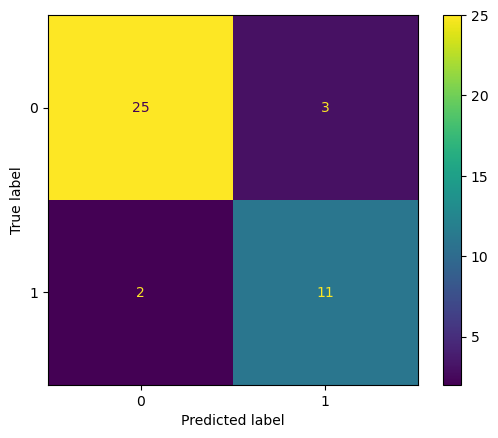


Evaluation: roc


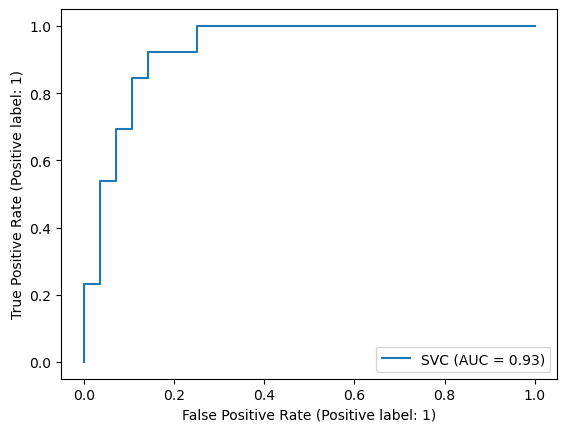

[(0.7607361963190183, 0.8148148148148148),
 (0.8318965517241379, 0.8780487804878049),
 (0.8266666666666667, 0.8461538461538461),
 (0.7045454545454546, 0.7857142857142857)]

In [5]:
print('F1 macro best model: {} evaluation'.format(type(best_model_dict['f1_macro']).__name__))
model_eval(best_model_dict['f1_macro'], X_train, X_test, y_train, y_test, confusion=True, roc=True)

Recall best model: SVC evaluation

Evaluation: f1_score
73.33% for the train data
74.29% for the test data

Evaluation: accuracy_score
79.31% for the train data
78.05% for the test data

Evaluation: recall_score
88.00% for the train data
100.00% for the test data

Evaluation: precision_score
62.86% for the train data
59.09% for the test data

Evaluation: confusion_matrix


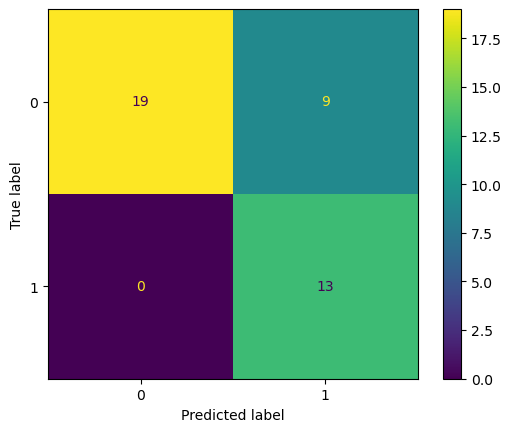


Evaluation: roc


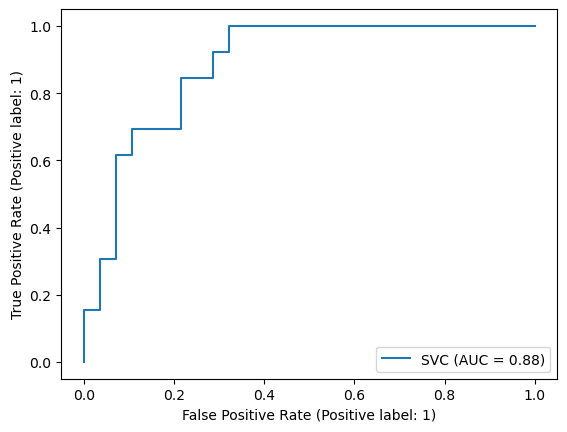

[(0.7333333333333334, 0.7428571428571429),
 (0.7931034482758621, 0.7804878048780488),
 (0.88, 1.0),
 (0.6285714285714286, 0.5909090909090909)]

In [6]:
print('Recall best model: {} evaluation'.format(type(best_model_dict['recall']).__name__))
model_eval(best_model_dict['recall'], X_train, X_test, y_train, y_test, confusion=True, roc=True)

# 2) Find best model with oversample preprocessed dataset

In [7]:
X_train2, X_test2, y_train2, y_test2 = load_train_test_oversampled()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
0,0.0,2.0,1.354699,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,0.794063,-0.775318,-1.927694,1.0,3.0,2.0,-0.416387,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3.0,1.0,0.420306,0.828180,1.341005,0.0,0.0,1.0,-0.416387,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,2.0,2.289092,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,-0.514087,-1.577067,-0.293345,3.0,1.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 258 entries with 18 columns in our training data.
There are 82 entries with 18 columns in our testing data.


In [8]:
best_model_dict2 = find_best_models(X_train2, X_test2, y_train2, y_test2, ros='ros')


Scoring: f1_macro

Model: DecisionTreeClassifier

Evaluation: f1_score
94.16% for the train data
58.62% for the test data

Model: DecisionTreeClassifier

Evaluation: f1_score
96.92% for the train data
51.85% for the test data

Model: LogisticRegression

Evaluation: f1_score
89.58% for the train data
49.06% for the test data

Model: LogisticRegression

Evaluation: f1_score
89.23% for the train data
49.06% for the test data

Model: RandomForestClassifier

Evaluation: f1_score
96.99% for the train data
55.56% for the test data

Model: RandomForestClassifier

Evaluation: f1_score
96.92% for the train data
55.56% for the test data

Model: XGBClassifier

Evaluation: f1_score
96.95% for the train data
54.55% for the test data

Model: XGBClassifier

Evaluation: f1_score
96.97% for the train data
56.60% for the test data

Model: SVC

Evaluation: f1_score
95.79% for the train data
43.14% for the test data

Model: SVC

Evaluation: f1_score
95.79% for the train data
43.14% for the test data

Mode

In [9]:
print('F1_macro best model: {} evaluation'.format(type(best_model_dict2['f1_macro']).__name__))
# model_eval(best_model_dict2['f1_macro'], X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

F1_macro best model: Net evaluation


In [10]:
print('Recall best model: {} evaluation'.format(type(best_model_dict2['recall']).__name__))
# model_eval(best_model_dict2['recall'], X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

Recall best model: LogisticRegression evaluation


### Extensive hyperparemeter search with the best model (normal preprocessed dataset)

In [11]:
# define the grid for the hyperparameter search
grid_svm = { 'C': [0.01, 0.1, 1, 10, 100, 1000], 
            'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'degree': [1, 2, 3], 
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'class_weight': ['balanced', None]
            }

In [12]:
from scipy.stats import uniform
from scipy.stats import randint

rand_svm = {
    'C': uniform(0.01, 100),
    'gamma': uniform(0.0001, 100),
    'degree': randint(1, 10)
}

In [13]:
svm_model = svm.SVC(random_state=0)

In [ ]:
run_gridsearchCV(svm_model, grid_svm, X_train, y_train, scoring='f1_macro', ros='final')
f1_best_model_grid = load_model(svm_model, 'f1_macro', ros='final', search='grid')
model_eval(f1_best_model_grid, X_train, X_test, y_train, y_test, confusion=True, roc=True)

Fitting 10 folds for each of 1008 candidates, totalling 10080 fits
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, g

[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01

[CV] END C=0.01, class_weight=balanced, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=10, kernel=poly; total time=   0

[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degre

[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2,

[CV] END C=0.01, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=100, kernel=poly;

[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree

[CV] END C=0.01, class_weight=balanced, degree=3, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=3, gamma=10, 

[CV] END C=0.01, class_weight=None, degree=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.0001, kernel=s

[CV] END C=0.01, class_weight=None, degree=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END

[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=1, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None

[CV] END C=0.01, class_weight=None, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.

[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_

[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_we

[CV] END C=0.01, class_weight=None, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=0.01, kernel=sigmoid; total time=   

[CV] END C=0.01, class_weight=None, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=None, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=

[CV] END C=0.1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma

[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.

[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=b

[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=

[CV] END C=0.1, class_weight=balanced, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=10, kernel=sigmoid; total 

[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degr

[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=1

[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=100, kernel=sigmoid; tota

[CV] END C=0.1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time= 

[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=1, gamma=1, kernel

[CV] END C=0.1, class_weight=None, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[

[CV] END C=0.1, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.

[CV] END C=0.1, class_weight=None, degree=2, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, d

[CV] END C=0.1, class_weight=None, degree=3, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.001, kernel=linear; t

[CV] END C=0.1, class_weight=None, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, d

[CV] END C=0.1, class_weight=None, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C

[CV] END C=1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.001, kernel=s

[CV] END C=1, class_weight=balanced, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.0

[CV] END C=1, class_weight=balanced, degree=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.1s
[CV] END C=1, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.1s
[CV] END C=1, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.1s
[CV] END C=1, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.1s
[CV] END C=1, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.1s
[CV] END C=1, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=   0.1s
[CV] END C=1, 

[CV] END C=1, class_weight=balanced, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=0.01, kerne

[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced,

[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=2, gamma=100, kernel=sigmoid; to

[CV] END C=1, class_weight=balanced, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoi

[CV] END C=1, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, degree=3, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END 

[CV] END C=1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[

[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, 

[CV] END C=1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=N

[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=1, clas

[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, g

[CV] END C=1, class_weight=None, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=

[CV] END C=1, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0

[CV] END C=10, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, g

[CV] END C=10, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=0.01, kernel=poly; total time=   0.0

[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END 

[CV] END C=10, class_weight=balanced, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree

[CV] END C=10, class_weight=balanced, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] EN

[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=2, gamma=100, kernel=poly; total time=   0.0s
[CV] END

[CV] END C=10, class_weight=balanced, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=0.01, ke

[CV] END C=10, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, degree=3, gamma=10, kernel=rbf; total time=   0.0s


[CV] END C=10, class_weight=None, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=10, 

[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=1, kernel=rbf; to

[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=poly; total time=   0.8s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=poly; total time=   0.8s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=poly; total time=   0.7s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=poly; total time=   0.8s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=poly; total time=   0.3s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=poly; total time=   0.4s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=poly; total time=   0.5s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=poly; total time=   0.4s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=1, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, 

[CV] END C=10, class_weight=None, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=

[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=2, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degr

[CV] END C=10, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=10,

[CV] END C=10, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, c

[CV] END C=10, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degre

[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=0

[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=poly; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] EN

[CV] END C=100, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, 

[CV] END C=100, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=

[CV] END C=100, class_weight=balanced, degree=2, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=10, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=2, gamma=10, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=2, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=10, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=2, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=10, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=2, gamma=10, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=2, gamma=10, kernel=rbf; total

[CV] END C=100, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=

[CV] END C=100, class_weight=balanced, degree=3, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=0.1, kernel=rbf; total time=   0

[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, degree=3, gamma=100, ker

[CV] END C=100, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] 

[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.1s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.1s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.1s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=1, 

[CV] END C=100, class_weight=None, degree=2, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=2, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.0001, kernel=rbf; total ti

[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=100, 

[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=100, kernel=rbf; total time=   0.0s
[CV] END C=100, 

[CV] END C=100, class_weight=None, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=0.001, kernel=sigmoid; total ti

[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.1s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3,

[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=None, degree=3, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END C=100, clas

[CV] END C=1000, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.7s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.9s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.8s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.6s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.6s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, 

[CV] END C=1000, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.6s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.2s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=1, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[

[CV] END C=1000, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  38.0s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time= 1.3min
[CV] END C=1000, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  35.6s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  35.2s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  59.4s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  30.2s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  23.2s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  33.9s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  43.7s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=100, kernel=poly; total time=  24.0s
[CV] END C=1000, class_weight=balanced, degree=1, gamma=100, kernel=si

[CV] END C=1000, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.7s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.8s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.6s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.6s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, 

[CV] END C=1000, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.6s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.2s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=1, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[

[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.0001, kernel=linear; total time=   0.7s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.0001, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.0001, kernel=linear; total time=   1.0s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.0001, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.0001, kernel=linear; total time=   0.8s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.0001, kernel=linear; total time=   0.6s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.0001, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.0001, kernel=linear; total time=   0.6s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.0001, kernel=linear; total time=   0.2s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.0001, kernel=linear; total time=   0.4s
[CV] END C=1000, cla

[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.6s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.6s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=1000, class_weight=balanced, degree=3, gamma

[CV] END C=1000, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.7s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   1.0s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.8s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.6s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.6s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.2s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=10, kernel=linear; total time=   0.4s
[CV] END C=1000, class_weight=balanced, degree=3, gamma=10, 

In [ ]:
run_randomizedsearchCV(svm_model, rand_svm, X_train, y_train, scoring='f1_macro', ros='final')
f1_best_model_rand = load_model(svm_model, 'f1_macro', ros='final', search='random')
model_eval(f1_best_model_rand, X_train, X_test, y_train, y_test, confusion=True, roc=True)

### with oversampled dataset

In [ ]:
# best setting with normal data set, evaluated on oversampled dataset
model_eval(f1_best_model_grid, X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

In [ ]:
model_eval(f1_best_model_rand, X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

In [ ]:
# find best setting for oversampled dataset
svm_model2 = svm.SVC(random_state=0)

In [ ]:
run_gridsearchCV(svm_model2, grid_svm, X_train2, y_train2, scoring='f1_macro', ros='final_ros')
f1_best_model_grid2 = load_model(svm_model2, 'f1_macro', ros='final_ros', search='grid')
model_eval(f1_best_model_grid2, X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

In [ ]:
run_randomizedsearchCV(svm_model2, rand_svm, X_train2, y_train2, scoring='f1_macro', ros='final_ros')
f1_best_model_rand2 = load_model(svm_model2, 'f1_macro', ros='final_ros', search='random')
model_eval(f1_best_model_rand2, X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

### Extensive hyperparemeter search with the best model (oversampled dataset)